In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


#한글 사용
from matplotlib import rc  
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False  

data = pd.read_csv('데이터찐최종1.csv') 
df = pd.DataFrame(data)

df.head() #데이터 확인

,행정구역코드,시도명,시군구명,읍면동명,혼잡시간강도,혼잡빈도강도,전체추정교통량,등록차수,교통량,승용차추정교통량,버스추정교통량,화물차추정교통량,주차장혼잡평균
0,1101053,서울특별시,종로구,사직동,95.12,90.43,18445,8170,2.257650,15038,100,3307,4.411215
1,1101054,서울특별시,종로구,삼청동,53.03,32.45,9841,777,12.665380,8195,39,1607,44.736760
2,1101055,서울특별시,종로구,부암동,74.40,60.51,17090,3140,5.442675,13951,107,3032,42.711838
3,1101056,서울특별시,종로구,평창동,59.39,45.55,13694,6609,2.072023,11105,86,2503,19.598131
4,1101057,서울특별시,종로구,무악동,67.78,36.04,25492,2796,9.117310,20986,142,4364,76.590343


<Axes: >

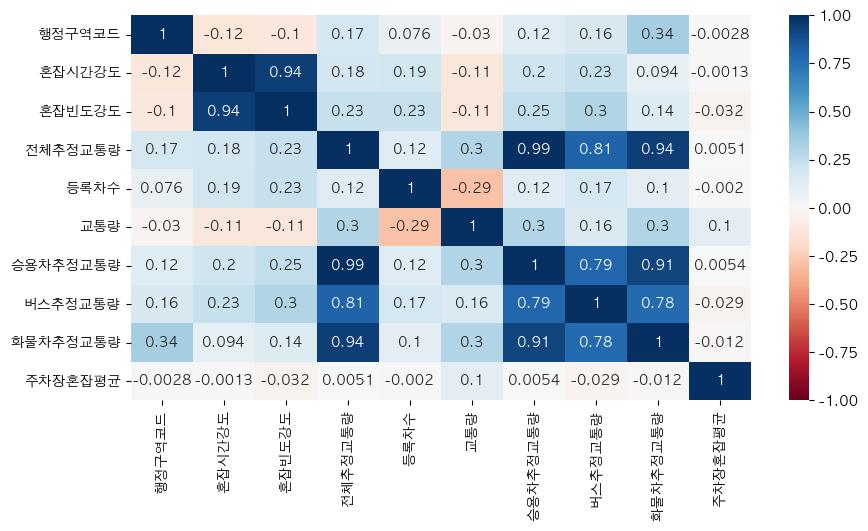

In [4]:
#상관계수 표현
new_df=df
new_df
temp = new_df.select_dtypes(include=['object']).columns #열의 data 타입==문자열
new=new_df.drop(columns=temp) # 문자열 데이터 삭제한 새로운 데이터 생성
df_corr=new.corr(method = 'pearson')  #상관계수 구하기


# #음의 상관계수(하나 증가 다른것 감소, ===>반비례)
# #양의 상관계수(하나가 증가할때 다른것도 증가하면, 하나가 감소 다른것도 감소===>비례)
# #0(상관 관계 X)

fig,ax =plt.subplots(figsize=(10,5))
# 상관계수 표 그림으로 표현(이 부분 빼면 그냥 표로 나옴)
sns.heatmap(df_corr,
            annot=True, # 박스안 데이터 값 자동 입력
            vmin=-1,vmax=1, # 최소 최대 색깔 지정
            cmap='RdBu'  # 색깔 테마 선택
       )

In [5]:
#y=혼잡시간강도에 따른 변수선택
import statsmodels.api as sm
import pandas as pd

# 후진 소거법을 위한 함수 정의
def backward_elimination(data, target_col, significance_level=0.05):
    variables = data.columns.tolist()
    variables.remove(target_col)
    
    while len(variables) > 0:
        X = sm.add_constant(data[variables])
        y = data[target_col]
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues[1:]
        max_p_value = p_values.max()
        
        if max_p_value >= significance_level:
            remove_variable = p_values.idxmax()
            variables.remove(remove_variable)
        else:
            break
    
    return variables

# 후진 소거법 함수 호출
selected_variables = backward_elimination(new, '혼잡시간강도')
print(selected_variables)


['혼잡빈도강도', '버스추정교통량']


In [6]:
import statsmodels.formula.api as smf
formula='혼잡시간강도~버스추정교통량+혼잡빈도강도'
result=smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 혼잡시간강도   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1582.
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          5.52e-196
Time:                        02:58:50   Log-Likelihood:                -1242.8
No. Observations:                 422   AIC:                             2492.
Df Residuals:                     419   BIC:                             2504.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3052      0.632     57.443      0.000      35.063      37.548
버스추정교통량       -0.0034      0.001     -3.159      0.002      -0.006      -0.001
혼잡빈도강도         0.6892      0.013     54.536      0.000       0.664       0.714
==============================================================================
Omnibus:                       23.982   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.551
Skew:                          -0.486   Prob(JB):                     2.32e-07
Kurtosis:                       3.889   Cond. No.                         831.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""